In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
from matplotlib import pyplot as plt
from abnumber import Chain
from bin.evaluation import plot_oasis_curves

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
oasis_curves = pd.read_excel('../../data/germlines/imgt_human_v_genes_raw_oasis.xlsx', sheet_name='OASis Curves', index_col=0)
oasis_curves.insert(0, 'Family', oasis_curves.index.map(lambda i: i.split('-')[0].split('/')[0]))
oasis_curves.insert(1, 'Chain', oasis_curves.index.map(lambda i: i[2]))
oasis_curves.head()

,Family,Chain,0%,1%,2%,3%,4%,5%,6%,7%,...,81%,82%,83%,84%,85%,86%,87%,88%,89%,90%
Antibody,,,,,,,,,,,,,,,,,,,,,
IGHV1-18*01,IGHV1,H,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
IGHV1-18*02,IGHV1,H,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
IGHV1-18*03,IGHV1,H,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.966667,0.966667,0.955556,0.955556,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333
IGHV1-18*04,IGHV1,H,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
IGHV1-2*01,IGHV1,H,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.911111,0.900000,0.900000,0.900000,0.900000,0.900000,0.877778,0.877778,0.877778,0.877778


In [9]:
COLORS = [plt.get_cmap('tab20')(i) for i in range(20)]
COLORS

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0),
 (0.6823529411764706, 0.7803921568627451, 0.9098039215686274, 1.0),
 (1.0, 0.4980392156862745, 0.054901960784313725, 1.0),
 (1.0, 0.7333333333333333, 0.47058823529411764, 1.0),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0),
 (0.596078431372549, 0.8745098039215686, 0.5411764705882353, 1.0),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392, 1.0),
 (1.0, 0.596078431372549, 0.5882352941176471, 1.0),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353, 1.0),
 (0.7725490196078432, 0.6901960784313725, 0.8352941176470589, 1.0),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354, 1.0),
 (0.7686274509803922, 0.611764705882353, 0.5803921568627451, 1.0),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0),
 (0.9686274509803922, 0.7137254901960784, 0.8235294117647058, 1.0),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745, 1.0),
 (0.7803921568627451

In [12]:
COLORS = [
     (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0),
     (0.6823529411764706, 0.7803921568627451, 0.9098039215686274, 1.0),
     (1.0, 0.4980392156862745, 0.054901960784313725, 1.0),
     (1.0, 0.7333333333333333, 0.47058823529411764, 1.0),
     (0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0),
     (0.596078431372549, 0.8745098039215686, 0.5411764705882353, 1.0),
     (0.8392156862745098, 0.15294117647058825, 0.1568627450980392, 1.0),
     (1.0, 0.596078431372549, 0.5882352941176471, 1.0),
     (0.5803921568627451, 0.403921568627451, 0.7411764705882353, 1.0),
     (0.7725490196078432, 0.6901960784313725, 0.8352941176470589, 1.0),
     (0.5490196078431373, 0.33725490196078434, 0.29411764705882354, 1.0),
     (0.7686274509803922, 0.611764705882353, 0.5803921568627451, 1.0),
     (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0),
     (0.9686274509803922, 0.7137254901960784, 0.8235294117647058, 1.0),
     (0.4980392156862745, 0.4980392156862745, 0.4980392156862745, 1.0),
     (0.7803921568627451, 0.7803921568627451, 0.7803921568627451, 1.0),
     (0.7372549019607844, 0.7411764705882353, 0.13333333333333333, 1.0),
     (0.8588235294117647, 0.8588235294117647, 0.5529411764705883, 1.0),
     (0.09019607843137255, 0.7450980392156863, 0.8117647058823529, 1.0),
     (0.6196078431372549, 0.8549019607843137, 0.8980392156862745, 1.0),
]

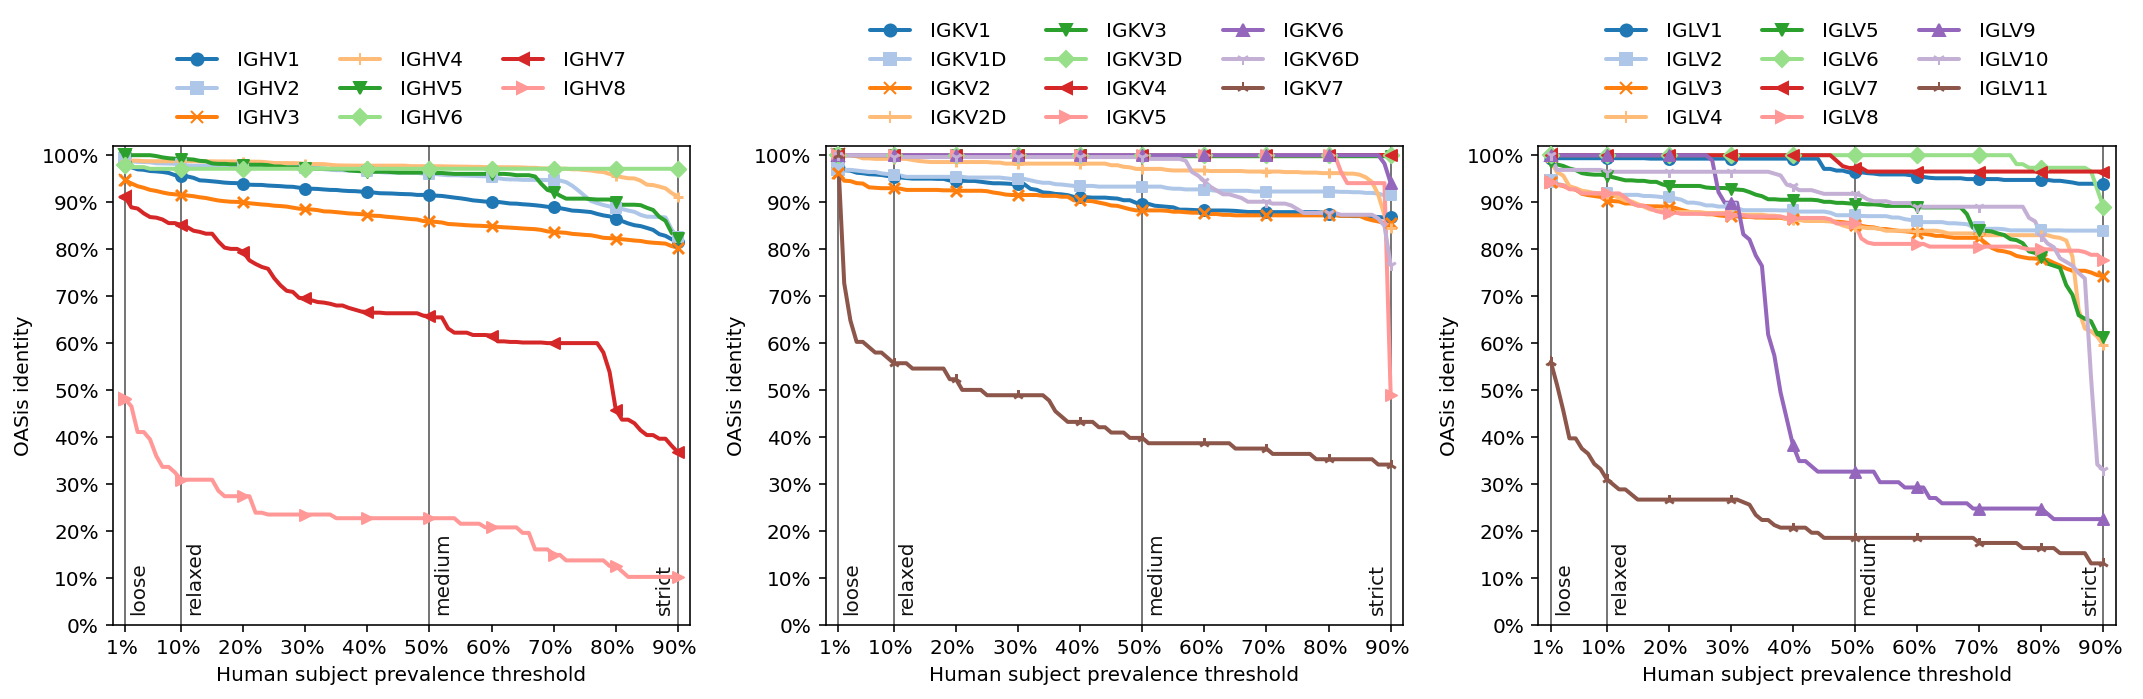

In [43]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for chain, ax in zip('HKL', axes):
    mean = oasis_curves[oasis_curves['Chain'] == chain].groupby('Family').mean()
    mean = mean.loc[sorted(mean.index, key=lambda s: int(''.join(a for a in s if a.isnumeric())))]
    colors = dict(zip(mean.index, COLORS))
    plot_oasis_curves(mean, errorbars=False, ax=ax, lw=2, colors=colors, markers='osx+vD<>^1234')
    ax.set_ylim(0, 1.02)
    ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1), frameon=False, handletextpad=1, ncol=3)
fig.tight_layout();

/Users/prihodad/Documents/bioinformatics/projects/github/BioPhi-2021-publication/bin/evaluation.py:230: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  curves_low = grouped.quantile(0.25)[columns]
/Users/prihodad/Documents/bioinformatics/projects/github/BioPhi-2021-publication/bin/evaluation.py:231: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  curves_high = grouped.quantile(0.75)[columns]
/Users/prihodad/Documents/bioinformatics/projects/github/BioPhi-2021-publication/bin/evaluation.py:230: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quanti

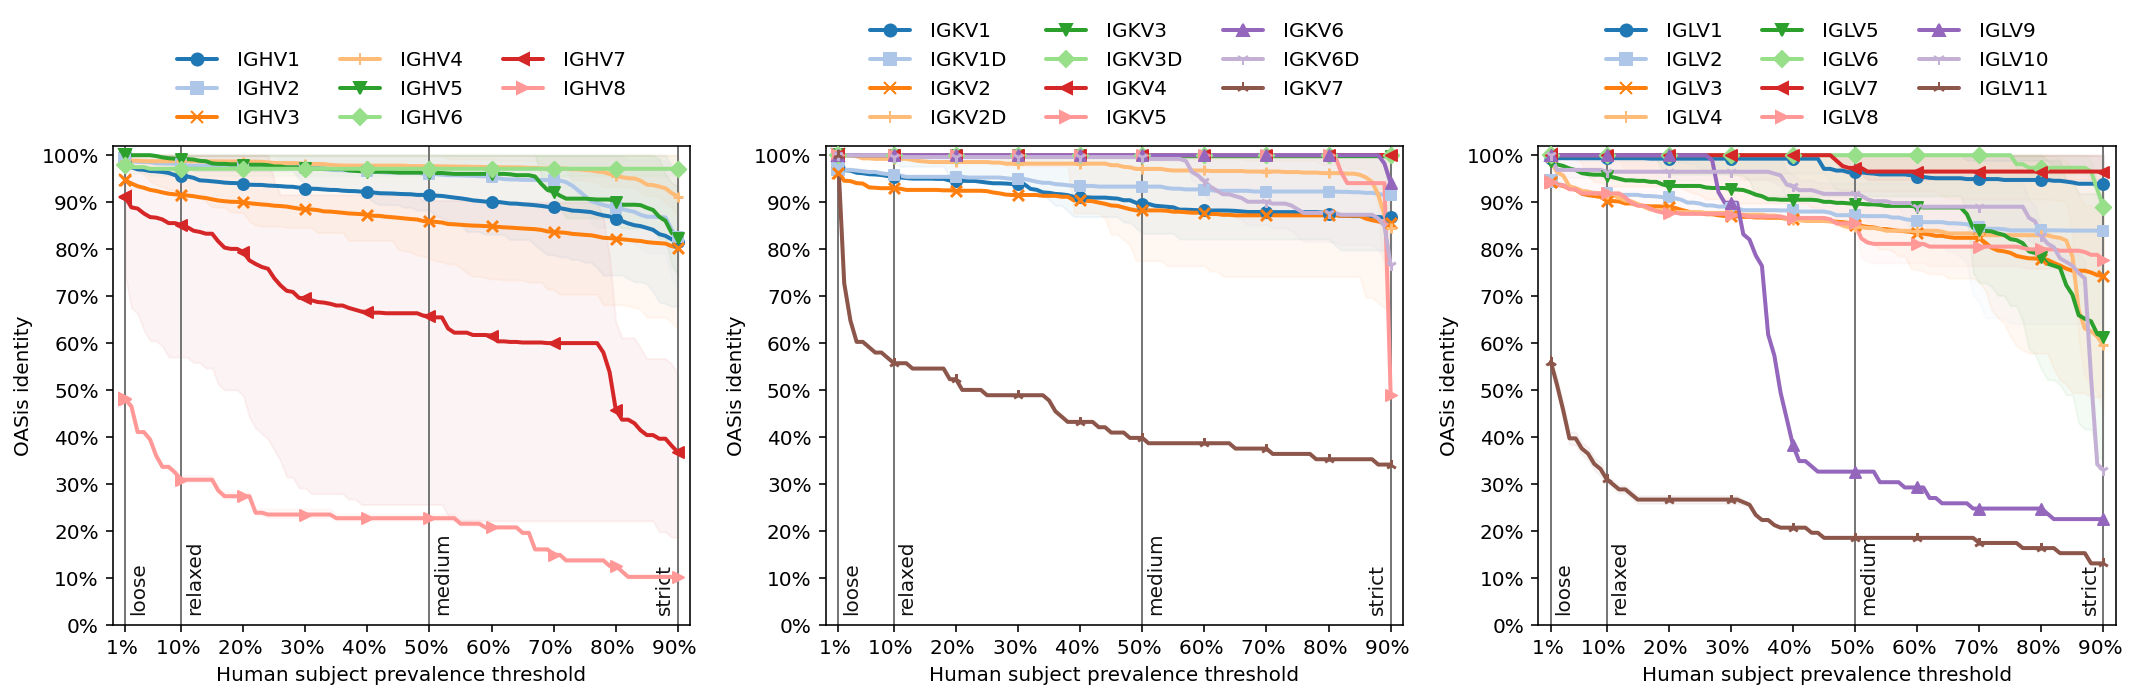

In [46]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for chain, ax in zip('HKL', axes):
    mean = oasis_curves[oasis_curves['Chain'] == chain].groupby('Family').mean()
    mean = mean.loc[sorted(mean.index, key=lambda s: int(''.join(a for a in s if a.isnumeric())))]
    colors = dict(zip(mean.index, COLORS))
    plot_oasis_curves(oasis_curves, groupby='Family', ax=ax, lw=2, colors=colors, fill_alpha=0.05, markers='osx+vD<>^1234')
    ax.set_ylim(0, 1.02)
    ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1), frameon=False, handletextpad=1, ncol=3)
fig.tight_layout();

In [29]:
# in how many subjects do we find all the peptides?
prevalence_subjects = (oasis_curves[[c for c in oasis_curves if '%' in c]] >= 0.9999).apply(lambda row: row[row].index[-1], axis=1)
prevalence_subjects = prevalence_subjects.str.replace('%','').astype(float)
prevalence_subjects.sort_values()

Antibody
IGHV4-31*05          0.0
IGHV3/OR16-15*01     0.0
IGHV3/OR16-15*02     0.0
IGHV3/OR16-16*01     0.0
IGHV3/OR16-18*01     0.0
                    ... 
IGHV3-11*01         90.0
IGHV3-11*04         90.0
IGHV4-39*07         90.0
IGHV4-39*05         90.0
IGHV1-18*01         90.0
Length: 608, dtype: float64

<AxesSubplot:ylabel='Density'>

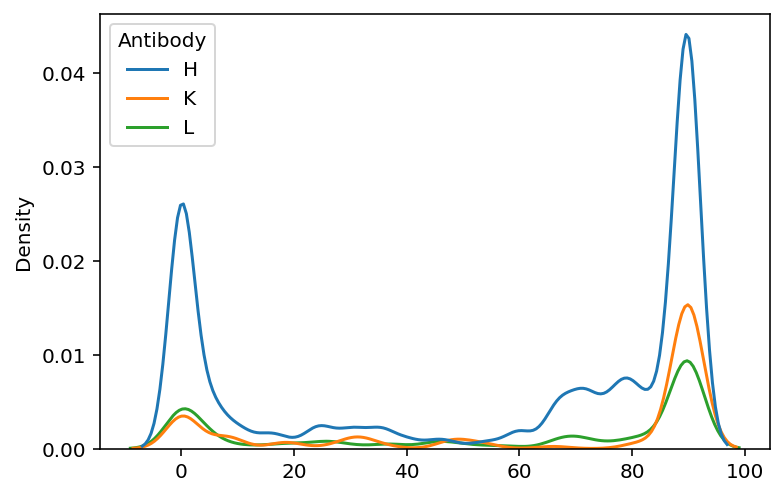

In [39]:
sns.kdeplot(
    x=prevalence_subjects,
    hue=prevalence_subjects.index.map(lambda c: c[2]),
    bw_adjust=0.2,
)

In [73]:
prevalence_best_by_family = prevalence_subjects.groupby([oasis_curves['Family'], oasis_curves['Chain']])
prevalence_best_by_family = prevalence_best_by_family.apply(lambda rows: rows.sort_values(ascending=False)[:3])
prevalence_best_by_family = prevalence_best_by_family.rename('Subjects').reset_index()
prevalence_best_by_family.head()

,Family,Chain,Antibody,Subjects
0,IGHV1,H,IGHV1-69*06,90.0
1,IGHV1,H,IGHV1-69D*01,90.0
2,IGHV1,H,IGHV1-18*02,90.0
3,IGHV2,H,IGHV2-26*02,90.0
4,IGHV2,H,IGHV2-26*01,90.0


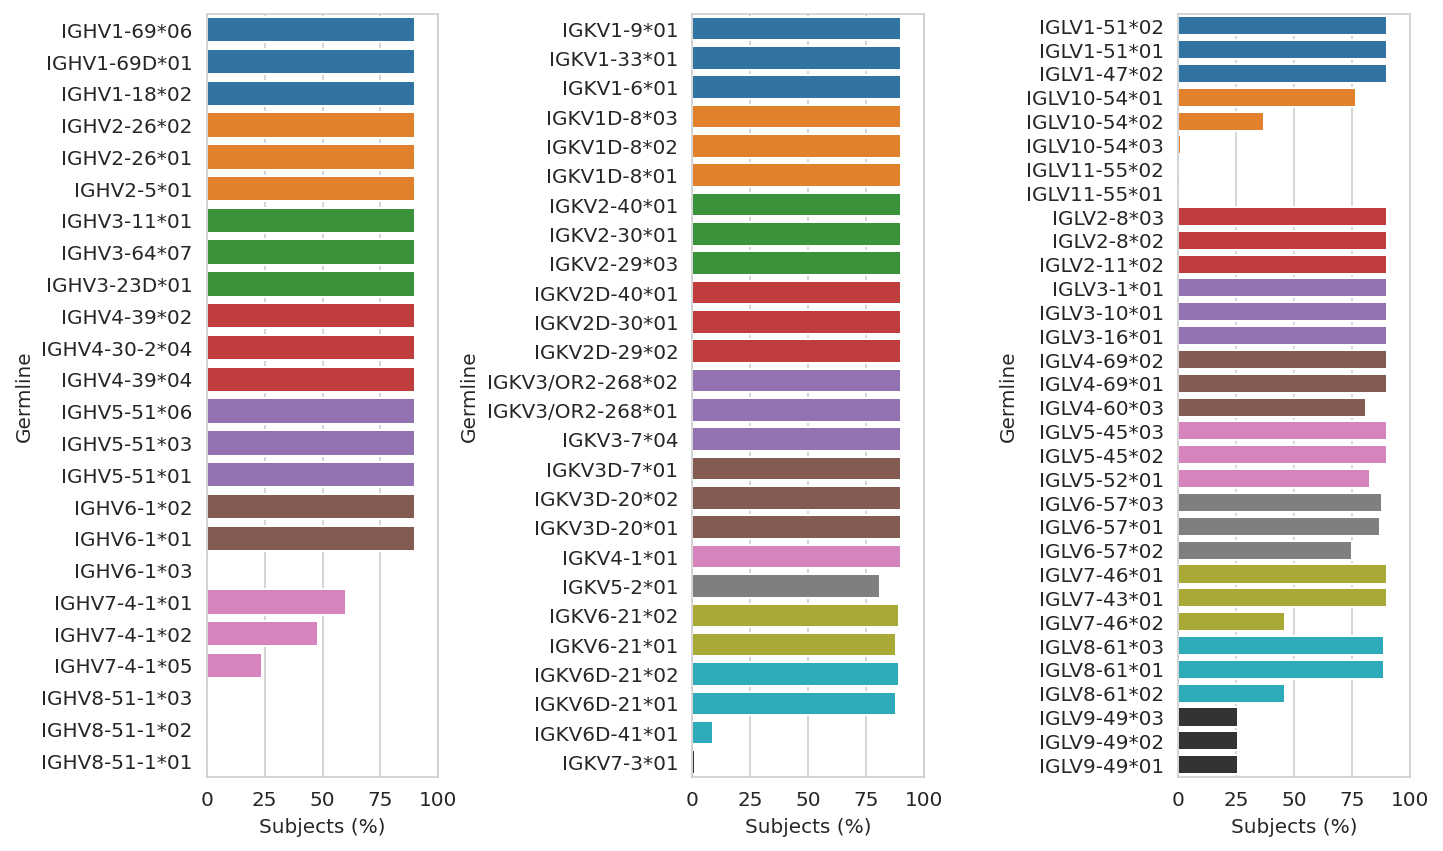

In [74]:
with sns.axes_style('whitegrid'):
    fig, axes = plt.subplots(1, 3, figsize=(10, 6))
    for i, (chain_type, prevalence) in enumerate(prevalence_best_by_family.groupby('Chain')):
        families = prevalence['Family'].unique().tolist()
        ax = sns.barplot(
            data=prevalence,
            y='Antibody',
            x='Subjects',
            palette=[COLORS[families.index(f)] for f in prevalence['Family']],
            ax=axes[i]
        )
        ax.set_xticks([0, 25, 50, 75, 100])
        ax.set_xlabel('Subjects (%)')
        ax.set_ylabel('Germline')
    fig.tight_layout();

In [28]:
#germline_peptides = pd.read_excel('../../data/germlines/imgt_human_v_genes_raw_oasis.xlsx', sheet_name=None)